In [1]:
# # This is a simulation program

# Simulation of a Cellular Telephony Network
# Problem Statement
# The telecommunication company XPhone has been receiving complaints from its subscribers
# regarding quality of service (QoS) along a 40 km long highway connecting two major cities.
# The highway is covered by its cellular telephony network. The company needs to decide
# whether or not its system guarantees quality of service (QoS) in terms of percentages of
# dropped calls and blocked calls. Some measurements have been made of the traffic in the
# network on the highway. Your task is to model and simulate the system to determine
# whether the system can meet the quality of service requirements, and if so, which fixed
# channel allocation scheme offers the best service.
# Quality of Service (QoS) Requirements
# • blocked calls < 2%; and
# • dropped calls < 1%
# System Descriptions
# The two-way highway is 40 km long. The company uses 20 base stations, each covers a cell
# with 2 km diameter as shown in the figure below. There is no overlapping of cells. Where
# the reach of one base station ends, the reach of the next base station starts. Each base station
# has 10 channels so there are 10 channels available in each cell.
# When a subscriber initiates a call from within a cell, a channel in the cell will be allocated to
# the call. If no free channels are available in the base station, the call is blocked. When a
# subscriber making a call crosses a cell boundary before the end of the 40-km highway, the
# channel being used in the current cell is released and a new channel in the new cell has to be
# acquired: this is called a Handover. If a channel is not available in the new base station
# during a handover the call is dropped. When a subscriber making a call crosses the end of the
# 40-km highway (either end), the call will be terminated and the channel being used is
# released.
# A Fixed Channel Allocation (FCA) scheme is used. The company wants you to test at least
# two FCA schemes:
# (a) No channel reservation
# (b) 9 channels are allocated to each cell for new calls and handovers and 1 channel is
# reserved for handovers when the other 9 channels are not available. This means a new
# call will not be allocated a channel if there is only one free channel left.
# The company has provided the following measurements:
# (a) Call initiation times and their first base stations
# 2
# (b) Call durations
# (c) Car speeds.
# Assumptions
# (a) The traffic volumes in the two directions are the same. This means the two directions of
# cars travelling along the highway have equal probabilities.
# (b) A car maintains the same speed during a call.
# (c) The position of the car initiating a call in a cell is uniformly distributed along the section
# of the highway covered by the base station.
# Your Tasks
# 1. Analyze the measured data to find what distributions the inter-arrival times of calls, the
# locations where calls are generated, the call durations, and car speeds follow
# respectively. You also need to find the parameter values of these distributions. (The
# measured data are provided in the file “PCS_TEST_DETERMINSTIC”)
# 2. Develop a discrete-event simulator.
# 3. Run your simulator multiple times, each with a warm-up period for different FCA
# schemes to investigate how handover reservation scheme may affect the quality of
# service (i.e., blocking and dropping probabilities). Calculate the average values of the
# percentages of dropped calls and blocked calls and indicate the statistical significance.
# Answer the following questions: Is the current system able to meet the quality of service
# requirements and if so how many channels should be reserved for handover for best
# service? (The percentage of dropped calls is defined as the number of dropped calls
# divided by the total number of calls; and the percentage of blocked calls is defined as the
# number of blocked calls divided by the total number of calls.)
# The discrete-event simulator
# You may implement the discrete-event simulator using any general purpose programming
# language (e.g., Python, Java, C, or C++). You may use any PC in the Software Project
# Laboratory or your own laptop. But you may not use a simulation package or a simulation
# language.
# Three types of events should be handled by the simulator:
# • Call initiation [time, speed, station, position, duration, direction]
# • Call termination [time, station]
# • Call handover [time, speed, station, duration, direction]
# Report
# Your report should be submitted in 2 parts.
# Part 1: Pseudocode or flowcharts of the event handling functions and the main function. Enough
# details should be given to show how system states are changed and future events scheduled in the
# event handling routines. The level of details should be similar to our lecture slides 20-23 of
# chapter 2 but not at the level of your programming code.
# Please name your report by yourname_assignment1_p1.
# Part 1 should be submitted by 11.59pm, Sunday, Week 6 to the relevant Assignment folder in
# the course site.
# Part 2 of the report should include:
# 3
# 1) Input analysis;
# 2) Corrections/changes, if any, done to your pseudocode for the simulator
# 3) Discussion of how you determine the “warm up period”;
# 4) Summary of simulation results and your conclusions and recommendations.


# Assumptions:
# 1. The traffic volumes in the two directions are the same. This means the two directions of cars travelling along the highway have equal probabilities.
# 2. A car maintains the same speed and direction during a call.
# 3. The position of the car initiating a call in a cell is uniformly distributed along the section of the highway covered by the base station.
# Fixed Channel Allocation(FCA) Scheme
# 1. No channel reservation
# 2. 9 channels are allocated to each cell for new calls and handovers and 1 channel is reserved for handovers when the other 9 channels are not available. This means a new call will not be allocated to a channel if there is only one free channel left.
# Types of events
# 1. Call initiation [time, speed, station, position, duration, direction]
# 2. Call termination [time, station]
# 3. Call handover [time, speed, station, duration, direction]
# Variables
# 1. System state
#   1. Cell Channels: Implementing as an array
# 2. Simulation Clocks
#   1. Clock
# 3. Event list
#   1. Future event list(FEL): Implementing with queue
# 4. Statistical counters
#   1. Total number of calls
#   2. Blocked calls
#   3. Dropped calls
#   4. Finished calls
# 5. Parameters
#   1. Call Initiation
#     1. [Time, Speed, Station, Position, Duration, Direction]
#   2. Call Termination
#     1. [Time, Station]
#   3. Call Handover
#     1. [Time, Speed, Station, Duration, Direction]



In [2]:
# Main Program

# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Read the input data from the file
file_path = '../Data/PCS_Test_Deterministic.xls'
data = pd.read_excel(file_path)

# Extract the data from the file

# Extract headers
headers = data.columns

# Extract the data
arr_no = data[headers[0]]
arr_time = data[headers[1]]
arr_station = data[headers[2]]
call_duration = data[headers[3]]
car_speed = data[headers[4]]

# Close file to free up resources
data = None


In [3]:
# Input Analysis

# Number of calls
total_calls = len(arr_no)
print(f'Total number of calls from data: {total_calls}')

# Arrival time of calls
# Plotting histogram

# As inter-arrival times are usually exponentially distributed, we try to plot the histogram of inter-arrival times

# Determining number of intervals
n = int(np.sqrt(total_calls))
print(f'Number of intervals: {n}')

print()


Total number of calls from data: 10000
Number of intervals: 100



Analysis of Inter-arrival times


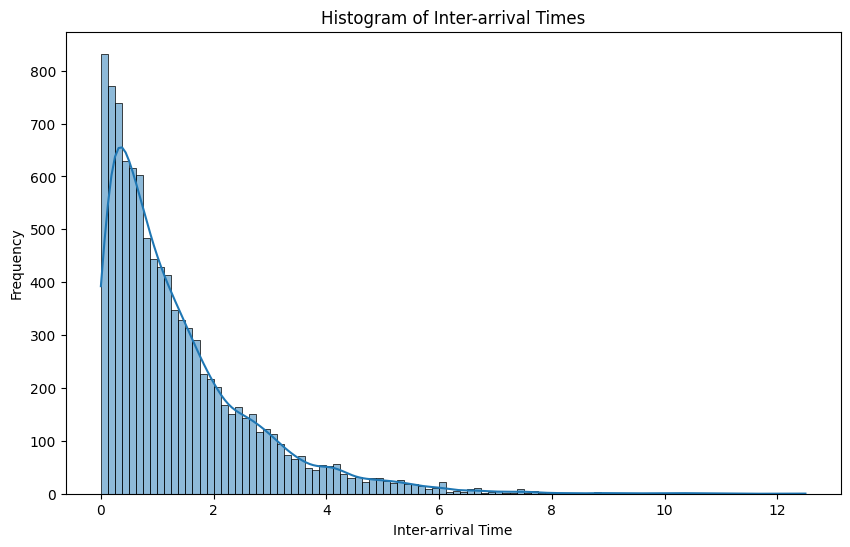

Mean of inter-arrival times: 1.3698169264765245
Expected frequencies: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]
Points of intervals: [0.01376712 0.02767401 0.04172354 0.05591866 0.07026242 0.08475798
 0.09940856 0.11421754 0.12918837 0.14432462 0.15962999 0.17510832
 0.19076354 0.20659975 0.22262118 0.23883222 0.25523741 0.27184145
 0.28864924 0.30566581 0.32289644 0.34034658 0.35802188 0.37592824
 0.39407177 0.41245885 0.43109611 0.44999043 0.46914902 0.48857938
 0.50828931 0.52828699 0.54858095 0.56918009 0.59009373 0.6113316

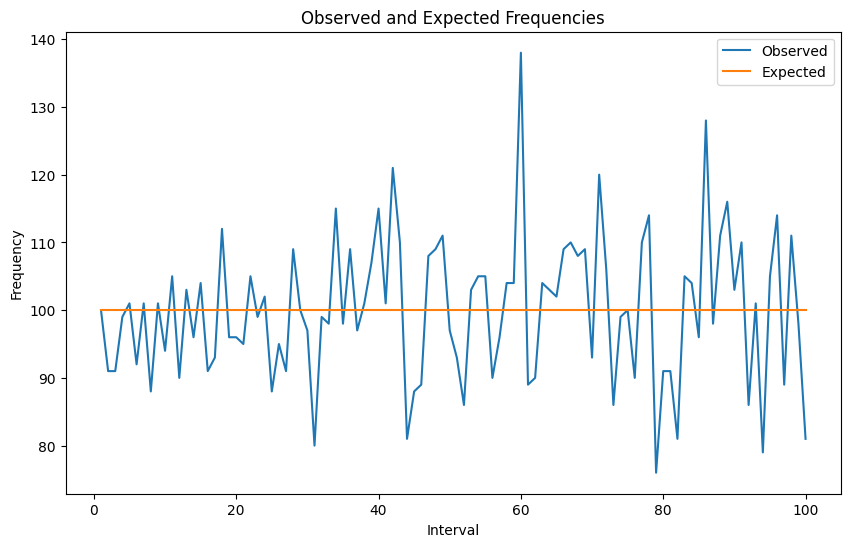

Chi-square statistic array: [0.000e+00 8.100e-01 8.100e-01 1.000e-02 1.000e-02 6.400e-01 1.000e-02
 1.440e+00 1.000e-02 3.600e-01 2.500e-01 1.000e+00 9.000e-02 1.600e-01
 1.600e-01 8.100e-01 4.900e-01 1.440e+00 1.600e-01 1.600e-01 2.500e-01
 2.500e-01 1.000e-02 4.000e-02 1.440e+00 2.500e-01 8.100e-01 8.100e-01
 0.000e+00 9.000e-02 4.000e+00 1.000e-02 4.000e-02 2.250e+00 4.000e-02
 8.100e-01 9.000e-02 1.000e-02 4.900e-01 2.250e+00 1.000e-02 4.410e+00
 1.000e+00 3.610e+00 1.440e+00 1.210e+00 6.400e-01 8.100e-01 1.210e+00
 9.000e-02 4.900e-01 1.960e+00 9.000e-02 2.500e-01 2.500e-01 1.000e+00
 1.600e-01 1.600e-01 1.600e-01 1.444e+01 1.210e+00 1.000e+00 1.600e-01
 9.000e-02 4.000e-02 8.100e-01 1.000e+00 6.400e-01 8.100e-01 4.900e-01
 4.000e+00 3.600e-01 1.960e+00 1.000e-02 0.000e+00 1.000e+00 1.000e+00
 1.960e+00 5.760e+00 8.100e-01 8.100e-01 3.610e+00 2.500e-01 1.600e-01
 1.600e-01 7.840e+00 4.000e-02 1.210e+00 2.560e+00 9.000e-02 1.000e+00
 1.960e+00 1.000e-02 4.410e+00 2.500e-01 1.960e+0

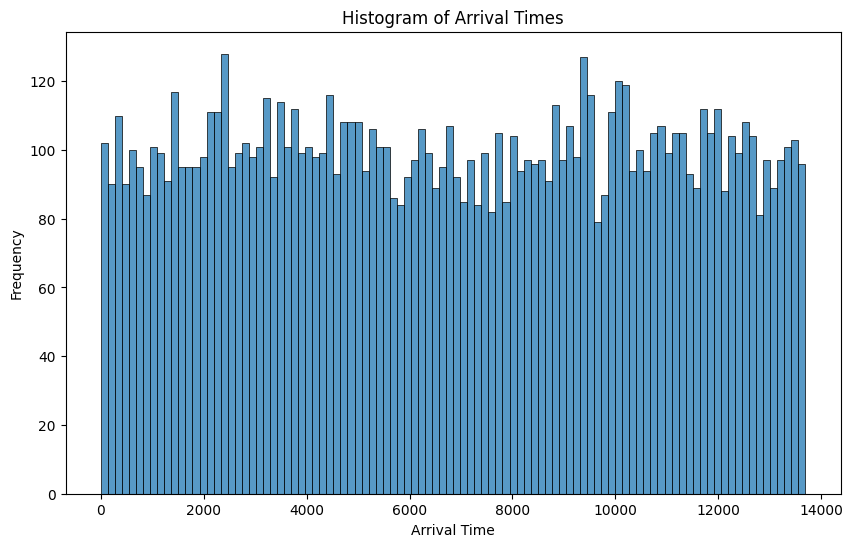

This proves that if inter-arrival times are exponentially distributed, then the arrival times are uniformly distributed.


In [4]:

# Inter-arrival times
print('Analysis of Inter-arrival times')

inter_arrival_times = np.diff(arr_time)
plt.figure(figsize=(10, 6))
sns.histplot(inter_arrival_times, bins=n, kde=True)
plt.title('Histogram of Inter-arrival Times')
plt.xlabel('Inter-arrival Time')
plt.ylabel('Frequency')
plt.show()

# As the MLE of the parameter of the exponential distribution is the mean of the data, we calculate the mean of the inter-arrival times
mean_inter_arrival_time = np.mean(inter_arrival_times)
print(f'Mean of inter-arrival times: {mean_inter_arrival_time}')

# Chi-square goodness of fit test
# The null hypothesis is that the inter-arrival times follow an exponential distribution

# Expected proportion of the data in each interval
expected_proportion = 1 / n

# Expected frequencies
expected = np.ones(n) * total_calls * expected_proportion
print(f'Expected frequencies: {expected}')

# Calculate points of intervals, formula: ai = (mean)*(ln(1/1-ipi))
points_of_intervals = np.zeros(n-1)
for i in range(1,n):
    ai = mean_inter_arrival_time * np.log(1 / (1 - (i / n)))
    points_of_intervals[i-1] = ai
print(f'Points of intervals: {points_of_intervals}')

# Calculate observed frequencies
observed = np.zeros(n)
for i in inter_arrival_times:
    for j in range(n):
      if j == n - 1:
          observed[j] += 1
          break
      else:
        if i < points_of_intervals[j]:
          observed[j] += 1
          break
print(f'Observed frequencies: {observed}')

# plot observed and expected frequencies  
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n + 1), observed, label='Observed')
plt.plot(np.arange(1, n + 1), expected, label='Expected')
plt.title('Observed and Expected Frequencies')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate the chi-square statistic
chi_square_statistic_array = np.zeros(n)
for i in range(n):
    chi_square_statistic_array[i] = ((observed[i] - expected[i]) ** 2) / expected[i]
print(f'Chi-square statistic array: {chi_square_statistic_array}')

# print table (Interval, Observed, Expected, (O-E)^2/E
table = pd.DataFrame({
    'Interval': np.arange(1, n + 1),
    'Observed': observed,
    'Expected': expected,
    '(O-E)^2/E': chi_square_statistic_array
})
print(table)

print(f'Chi-square statistic: {np.sum(chi_square_statistic_array)}')

# Calculate the degrees of freedom
degrees_of_freedom = n - 1 - 1
print(f'Degrees of freedom: {degrees_of_freedom}')

# Significance level & Critical value pair with degrees of freedom 95
significance_level_critical_value_pair_95 = {
    0.05: 118.75,
    0.1: 113.04
}

# Check if the chi-square statistic is greater than the critical value
for significance_level, critical_value in significance_level_critical_value_pair_95.items():
    print("Testing at", significance_level, "significance level")
    if np.sum(chi_square_statistic_array) > critical_value:
        print(f'Chi-square statistic is greater than the critical value: {critical_value}')
    else:
        print(f'Chi-square statistic is not greater than the critical value: {critical_value}')
        
# Null hypothesis accepted as chi-square statistic is not greater than the critical value
print("Null hypothesis is accepted as the chi-square statistic is not greater than the critical value")

# Plot the histogram of arrival times
plt.figure(figsize=(10, 6))
sns.histplot(arr_time, bins=n, kde=False)
plt.title('Histogram of Arrival Times')
plt.xlabel('Arrival Time')
plt.ylabel('Frequency')
plt.show()

print("This proves that if inter-arrival times are exponentially distributed, then the arrival times are uniformly distributed.")





Analysis of Base Stations
Unique Base stations: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]


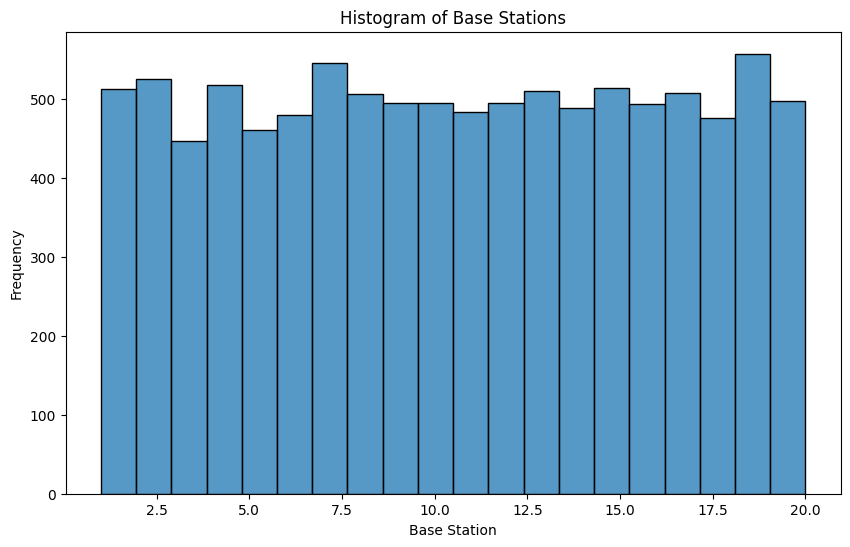

Number of calls in each base station: [512. 525. 446. 518. 460. 480. 545. 506. 494. 495. 483. 494. 510. 488.
 514. 493. 507. 476. 557. 497.]
Proportion of calls in each base station: [0.0512 0.0525 0.0446 0.0518 0.046  0.048  0.0545 0.0506 0.0494 0.0495
 0.0483 0.0494 0.051  0.0488 0.0514 0.0493 0.0507 0.0476 0.0557 0.0497]
Average proportion of calls in each base station: 0.049999999999999996
Chi-square goodness of fit test for base stations
H0: Calls are uniformly distributed across the base stations
H1: Calls are not uniformly distributed across the base stations
Expected proportion of calls in each base station: 0.05
As we are in a uniform discrete distribution, intuitively, the points of intervals are the same as the base station number, so we can use the same points of intervals as the base stations.


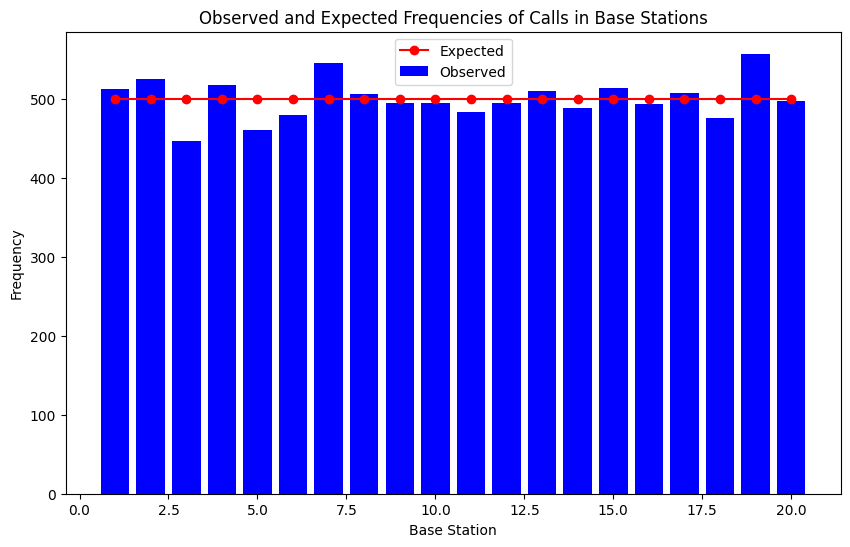

Chi-square statistic array: [0.288 1.25  5.832 0.648 3.2   0.8   4.05  0.072 0.072 0.05  0.578 0.072
 0.2   0.288 0.392 0.098 0.098 1.152 6.498 0.018]
    Base Station  Observed  Expected  (O-E)^2/E
0              1       512     500.0      0.288
1              2       525     500.0      1.250
2              3       446     500.0      5.832
3              4       518     500.0      0.648
4              5       460     500.0      3.200
5              6       480     500.0      0.800
6              7       545     500.0      4.050
7              8       506     500.0      0.072
8              9       494     500.0      0.072
9             10       495     500.0      0.050
10            11       483     500.0      0.578
11            12       494     500.0      0.072
12            13       510     500.0      0.200
13            14       488     500.0      0.288
14            15       514     500.0      0.392
15            16       493     500.0      0.098
16            17       507     50

In [5]:
# Base stations
print('Analysis of Base Stations')

# Number of base stations
base_stations = np.unique(arr_station)
print(f'Unique Base stations: {base_stations}')

# Plotting histogram of base stations
plt.figure(figsize=(10, 6))
sns.histplot(arr_station, bins=len(base_stations), kde=False)
plt.title('Histogram of Base Stations')
plt.xlabel('Base Station')
plt.ylabel('Frequency')
plt.show()

# Calculate the number of calls in each base station
no_calls_base_stations = np.zeros(len(base_stations))
for i in range(len(base_stations)):
    no_calls_base_stations[i] = np.sum(arr_station == base_stations[i])
print(f'Number of calls in each base station: {no_calls_base_stations}')
    

# Calculate the proportion of calls in each base station
proportion_calls = np.zeros(len(base_stations))
for i in range(len(base_stations)):
    proportion_calls[i] = np.sum(arr_station == base_stations[i]) / total_calls
print(f'Proportion of calls in each base station: {proportion_calls}')

# Average proportion of calls in each base station
average_proportion_calls = np.mean(proportion_calls)
print(f'Average proportion of calls in each base station: {average_proportion_calls}')

# Chi-square goodness of fit test
# The null hypothesis is that the calls are uniformly distributed across the base stations
print('Chi-square goodness of fit test for base stations')
print('H0: Calls are uniformly distributed across the base stations')
print('H1: Calls are not uniformly distributed across the base stations')

# Expected proportion of calls in each base station
expected_proportion_calls = 1 / len(base_stations)
print(f'Expected proportion of calls in each base station: {expected_proportion_calls}')

# Expected frequencies
expected = np.ones(len(base_stations)) * total_calls * expected_proportion_calls

# Observed frequencies
print("As we are in a uniform discrete distribution, intuitively, the points of intervals are the same as the base station number, so we can use the same points of intervals as the base stations.")
observed = np.array([np.sum(arr_station == i) for i in base_stations])

# plot observed and expected frequencies  
plt.figure(figsize=(10, 6))
plt.bar(base_stations, observed, color='b', label='Observed')
plt.plot(base_stations, expected, color='r', label='Expected', marker='o')
plt.xlabel('Base Station')
plt.ylabel('Frequency')
plt.title('Observed and Expected Frequencies of Calls in Base Stations')
plt.legend()
plt.show()

# Calculate the chi-square statistic
chi_square_statistic_array = np.zeros(len(base_stations))

for i in range(len(base_stations)):
    chi_square_statistic_array[i] = ((observed[i] - expected[i]) ** 2) / expected[i]
print(f'Chi-square statistic array: {chi_square_statistic_array}')

# print table (Base Station, Observed, Expected, (O-E)^2/E
table = pd.DataFrame({
    'Base Station': base_stations,
    'Observed': np.array([np.sum(arr_station == i) for i in base_stations]),
    'Expected': expected,
    '(O-E)^2/E': chi_square_statistic_array
})

print(table)

print(f'Chi-square statistic: {np.sum(chi_square_statistic_array)}')

# Calculate the degrees of freedom
degrees_of_freedom = len(base_stations) - 1

print(f'Degrees of freedom: {degrees_of_freedom}')

# Significance level & Critical value pair with degrees of freedom 95
# https://people.smp.uq.edu.au/YoniNazarathy/stat_models_B_course_spring_07/distributions/chisqtab.pdf
significance_level_critical_value_pair_19 = {
    0.05: 30.14,
    0.1: 27.20
}

for significance_level, critical_value in significance_level_critical_value_pair_19.items():
    print("Testing at", significance_level, "significance level")
    if np.sum(chi_square_statistic_array) > critical_value:
        print(f'Chi-square statistic is greater than the critical value: {critical_value}')
    else:
        print(f'Chi-square statistic is not greater than the critical value: {critical_value}')
        
# Null hypothesis accepted as chi-square statistic is not greater than the critical value
print("Null hypothesis is accepted as the chi-square statistic is not greater than the critical value")




Analysis of Call Durations


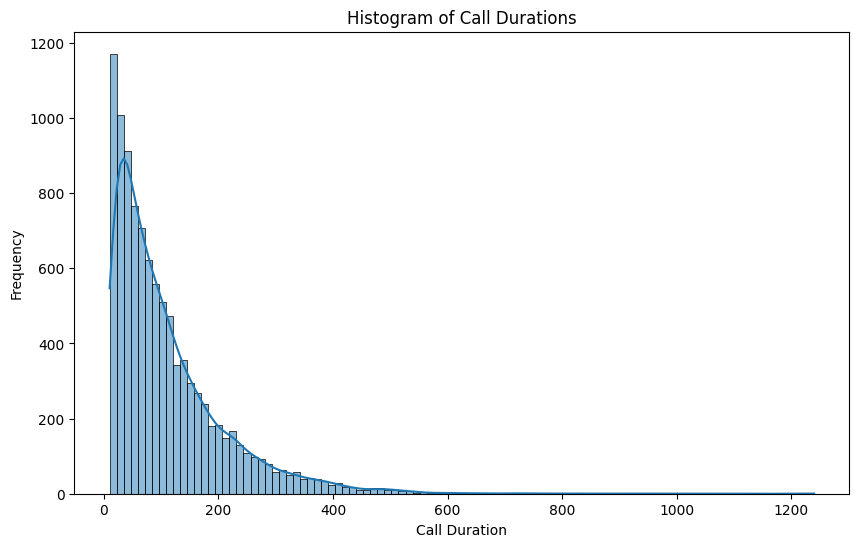

Mean of call durations: 109.8359007387477
min call duration: 10.003951603252272
Shifting the call durations by the minimum call duration, to get the shifted exponential distribution starting from 0


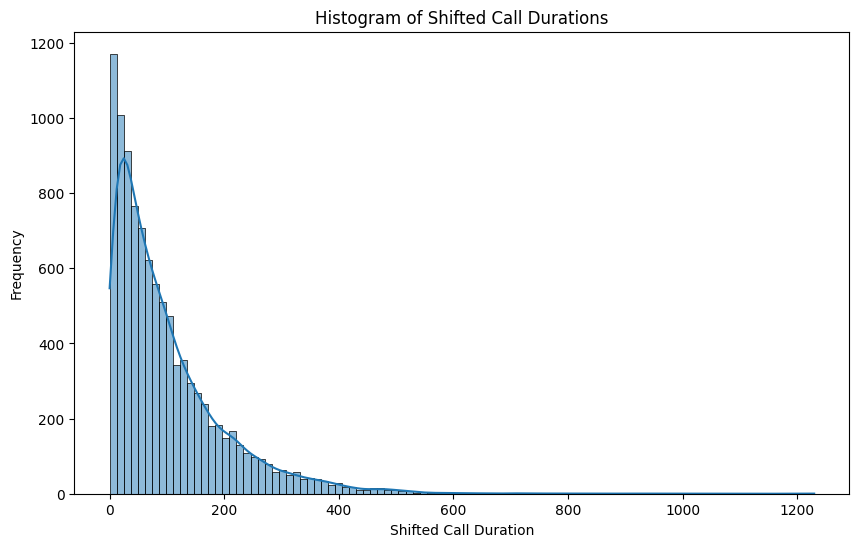

Mean of shifted call durations: 99.83194913549542
Expected frequencies: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]
Points of intervals: [  1.00334462   2.01687565   3.04080205   4.07533928   5.12070956
   6.17714216   7.24487372   8.32414854   9.41521896  10.51834564
  11.63379802  12.76185464  13.90280362  15.05694306  16.2245815
  17.40603848  18.60164497  19.81174402  21.03669128  22.27685566
  23.53262001  24.80438178  26.09255384  27.39756522  28.71986202
  30.05990831  31.41818707  32.7952013   34.1914751   35.60755486
  3

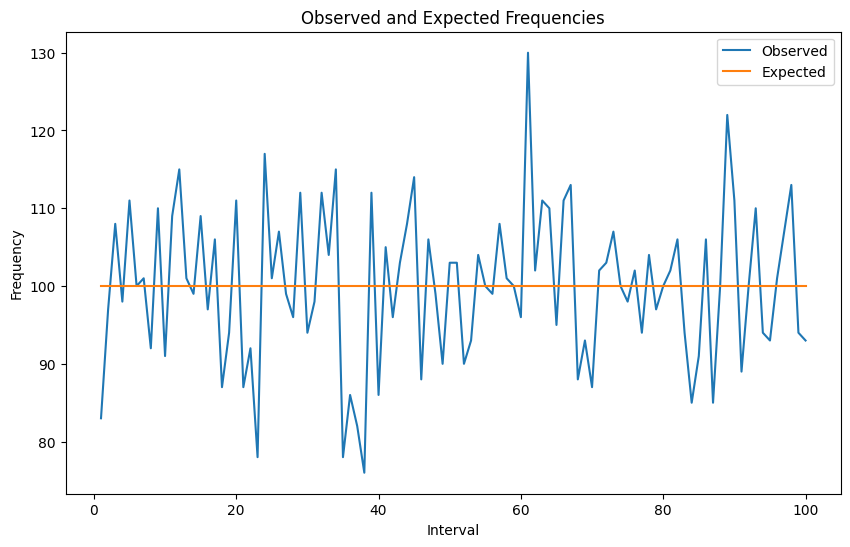

Chi-square statistic array: [2.89 0.09 0.64 0.04 1.21 0.   0.01 0.64 1.   0.81 0.81 2.25 0.01 0.01
 0.81 0.09 0.36 1.69 0.36 1.21 1.69 0.64 4.84 2.89 0.01 0.49 0.01 0.16
 1.44 0.36 0.04 1.44 0.16 2.25 4.84 1.96 3.24 5.76 1.44 1.96 0.25 0.16
 0.09 0.64 1.96 1.44 0.36 0.01 1.   0.09 0.09 1.   0.49 0.16 0.   0.01
 0.64 0.01 0.   0.16 9.   0.04 1.21 1.   0.25 1.21 1.69 1.44 0.49 1.69
 0.04 0.09 0.49 0.   0.04 0.04 0.36 0.16 0.09 0.   0.04 0.36 0.36 2.25
 0.81 0.36 2.25 0.   4.84 1.21 1.21 0.   1.   0.36 0.49 0.01 0.49 1.69
 0.36 0.49]
    Interval  Observed  Expected  (O-E)^2/E
0          1      83.0     100.0       2.89
1          2      97.0     100.0       0.09
2          3     108.0     100.0       0.64
3          4      98.0     100.0       0.04
4          5     111.0     100.0       1.21
..       ...       ...       ...        ...
95        96     101.0     100.0       0.01
96        97     107.0     100.0       0.49
97        98     113.0     100.0       1.69
98        99      94.0 

In [6]:
# Call durations
print('Analysis of Call Durations')

# Number of intervals
n = int(np.sqrt(total_calls))

# Plotting histogram of call durations
plt.figure(figsize=(10, 6))
sns.histplot(call_duration, bins=n, kde=True)
plt.title('Histogram of Call Durations')
plt.xlabel('Call Duration')
plt.ylabel('Frequency')
plt.show()

# As the MLE of the parameter of the exponential distribution is the mean of the data, we calculate the mean of the call durations
mean_call_duration = np.mean(call_duration)
print(f'Mean of call durations: {mean_call_duration}')

# minimum call duration
min_call_duration = np.min(call_duration)
print('min call duration:', min_call_duration)

# As the minimum call duration is non-zero, we know that this distribution is a shifted exponential distribution
# We can calculate the shift as the minimum call duration
shifted_call_duration = call_duration - min_call_duration 

print('Shifting the call durations by the minimum call duration, to get the shifted exponential distribution starting from 0')

# plotting histogram of shifted call durations
plt.figure(figsize=(10, 6))
sns.histplot(shifted_call_duration, bins=n, kde=True)
plt.title('Histogram of Shifted Call Durations')
plt.xlabel('Shifted Call Duration')
plt.ylabel('Frequency')
plt.show()

# Re-calculate the mean of the shifted call durations
mean_shifted_call_duration = np.mean(shifted_call_duration)
print(f'Mean of shifted call durations: {mean_shifted_call_duration}')

# Chi-square goodness of fit test
# The null hypothesis is that the call durations follow an exponential distribution

# Expected proportion of the data in each interval
expected_proportion = 1 / n

# Expected frequencies
expected = np.ones(n) * total_calls * expected_proportion
print(f'Expected frequencies: {expected}')

# Calculate points of intervals, formula: ai = (mean)*(ln(1/1-ipi))
points_of_intervals = np.zeros(n-1)
for i in range(1,n):
    ai = mean_shifted_call_duration * np.log(1 / (1 - (i / n)))
    points_of_intervals[i-1] = ai
print(f'Points of intervals: {points_of_intervals}')

# Calculate observed frequencies
observed = np.zeros(n)
for i in shifted_call_duration:
    for j in range(n):
      if j == n - 1:
          observed[j] += 1
          break
      else:
        if i < points_of_intervals[j]:
          observed[j] += 1
          break
print(f'Observed frequencies: {observed}')

# plot observed and expected frequencies  
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n + 1), observed, label='Observed')
plt.plot(np.arange(1, n + 1), expected, label='Expected')
plt.title('Observed and Expected Frequencies')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Calculate the chi-square statistic
chi_square_statistic_array = np.zeros(n)
for i in range(n):
    chi_square_statistic_array[i] = ((observed[i] - expected[i]) ** 2) / expected[i]
print(f'Chi-square statistic array: {chi_square_statistic_array}')

# print table (Interval, Observed, Expected, (O-E)^2/E
table = pd.DataFrame({
    'Interval': np.arange(1, n + 1),
    'Observed': observed,
    'Expected': expected,
    '(O-E)^2/E': chi_square_statistic_array
})
print(table)

print(f'Chi-square statistic: {np.sum(chi_square_statistic_array)}')

# Calculate the degrees of freedom
degrees_of_freedom = n - 1 - 1
print(f'Degrees of freedom: {degrees_of_freedom}')

# Significance level & Critical value pair with degrees of freedom 95
significance_level_critical_value_pair_95 = {
    0.05: 118.75,
    0.1: 113.04
}

# Check if the chi-square statistic is greater than the critical value
for significance_level, critical_value in significance_level_critical_value_pair_95.items():
    print("Testing at", significance_level, "significance level")
    if np.sum(chi_square_statistic_array) > critical_value:
        print(f'Chi-square statistic is greater than the critical value: {critical_value}')
    else:
        print(f'Chi-square statistic is not greater than the critical value: {critical_value}')
        
# Null hypothesis accepted as chi-square statistic is not greater than the critical value
print("Null hypothesis is accepted as the chi-square statistic is not greater than the critical value")


Analysis of Speed of Cars


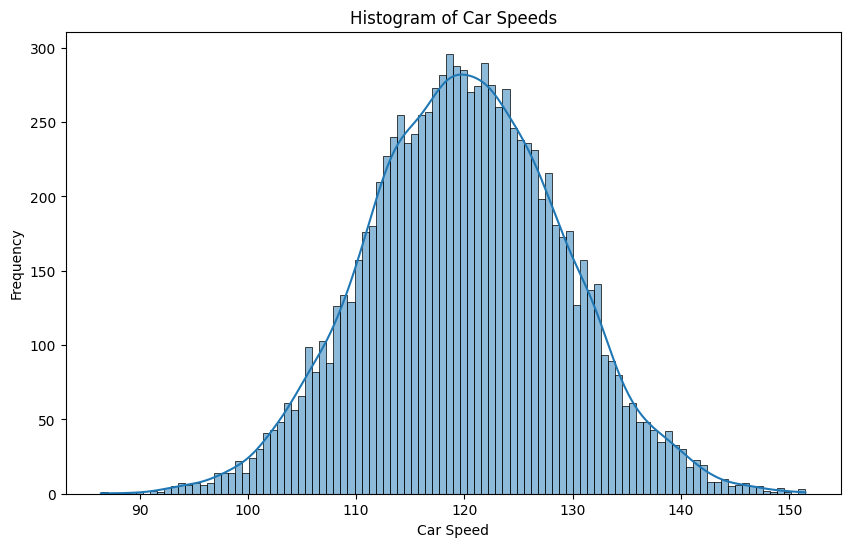

Mean of car speeds: 120.07209801685764
Standard deviation of car speeds: 9.018606933727643
Variance of car speeds: 81.33527102508032
Expected frequencies: [100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100. 100.
 100. 100.]
Points of intervals: [ 99.09168095 101.55014385 103.10995974 104.28334848 105.23780969
 106.0502061  106.76251882 107.4003099  107.98035537 108.51428818
 109.01052301 109.47535399 109.91361917 110.32912252 110.72491266
 111.10347326 111.46685665 111.81678009 112.1546964  112.48184692
 112.79930177 113.10799094 113.4087287  113.7022328

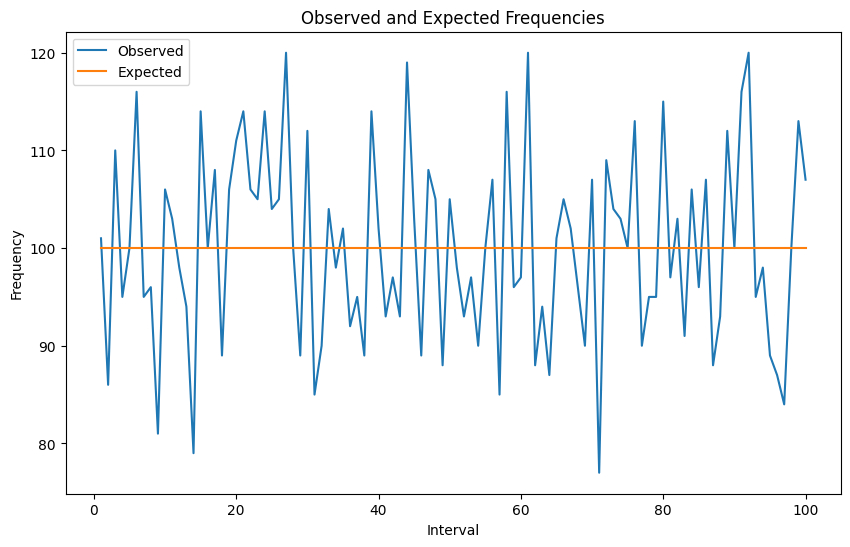

Chi-square statistic array: [0.01 1.96 1.   0.25 0.   2.56 0.25 0.16 3.61 0.36 0.09 0.04 0.36 4.41
 1.96 0.   0.64 1.21 0.36 1.21 1.96 0.36 0.25 1.96 0.16 0.25 4.   0.
 1.21 1.44 2.25 1.   0.16 0.04 0.04 0.64 0.25 1.21 1.96 0.04 0.49 0.09
 0.49 3.61 0.09 1.21 0.64 0.25 1.44 0.25 0.04 0.49 0.09 1.   0.   0.49
 2.25 2.56 0.16 0.09 4.   1.44 0.36 1.69 0.01 0.25 0.04 0.16 1.   0.49
 5.29 0.81 0.16 0.09 0.   1.69 1.   0.25 0.25 2.25 0.09 0.09 0.81 0.36
 0.16 0.49 1.44 0.49 1.44 0.   2.56 4.   0.25 0.04 1.21 1.69 2.56 0.
 1.69 0.49]
      Interval  Observed  Expected  (O-E)^2/E
0    99.091681     101.0     100.0       0.01
1   101.550144      86.0     100.0       1.96
2   103.109960     110.0     100.0       1.00
3   104.283348      95.0     100.0       0.25
4   105.237810     100.0     100.0       0.00
..         ...       ...       ...        ...
95  135.860848      87.0     100.0       1.69
96  137.034236      84.0     100.0       2.56
97  138.594052     100.0     100.0       0.00
98  141

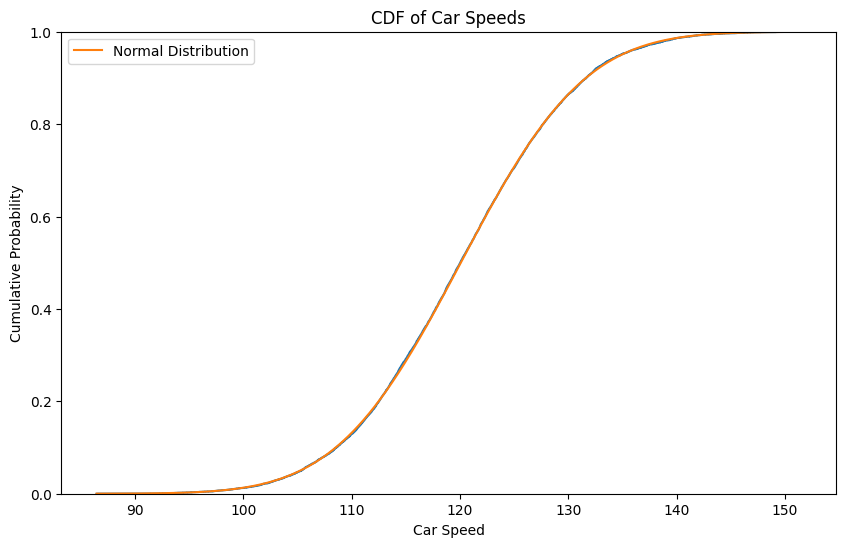

KS Statistic: 0.006439789372511606
KS P-value: 0.7987384412526035
Null hypothesis is accepted as the p-value is greater than 0.05


In [7]:

# Speed of cars
print('Analysis of Speed of Cars')

# Number of intervals
n = int(np.sqrt(total_calls))

# Plotting histogram of car speeds
plt.figure(figsize=(10, 6))
sns.histplot(car_speed, bins=n, kde=True)
plt.title('Histogram of Car Speeds')
plt.xlabel('Car Speed')
plt.ylabel('Frequency')
plt.show()

# As the MLE of the parameter of the normal distribution is the mean of the data, we calculate the mean of the car speeds
# We also calculate the standard deviation of the car speeds

mean_car_speed = np.mean(car_speed)
std_car_speed = np.std(car_speed)
print(f'Mean of car speeds: {mean_car_speed}')
print(f'Standard deviation of car speeds: {std_car_speed}')
print(f'Variance of car speeds: {std_car_speed ** 2}')

# Chi-square goodness of fit test
# The null hypothesis is that the car speeds follow a normal distribution

# Expected proportion of the data in each interval
expected_proportion = 1 / n

# Expected frequencies
expected = np.ones(n) * total_calls * expected_proportion
print(f'Expected frequencies: {expected}')


# Calculate points of intervals, formula: ai = NORMINV(i/n, mean, std)
points_of_intervals = np.zeros(n-1)
for i in range(1,n):
    ai = norm.ppf(i/n, mean_car_speed, std_car_speed)
    points_of_intervals[i-1] = ai
print(f'Points of intervals: {points_of_intervals}')

# Calculate observed frequencies
observed = np.zeros(n)
for i in car_speed:
    for j in range(n):
      if j == n - 1:
          observed[j] += 1
          break
      else:
        if i < points_of_intervals[j]:
          observed[j] += 1
          break
print(f'Observed frequencies: {observed}')

# plot observed and expected frequencies  
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, n + 1), observed, label='Observed')
plt.plot(np.arange(1, n + 1), expected, label='Expected')
plt.title('Observed and Expected Frequencies')
plt.xlabel('Interval')
plt.ylabel('Frequency')
plt.legend()
plt.show()


# Calculate the chi-square statistic
chi_square_statistic_array = np.zeros(n)
for i in range(n):
    chi_square_statistic_array[i] = ((observed[i] - expected[i]) ** 2) / expected[i]    
print(f'Chi-square statistic array: {chi_square_statistic_array}')

# Append the last interval inf
points_of_intervals = np.append(points_of_intervals, np.inf) 

# print table (Interval, Observed, Expected, (O-E)^2/E
table = pd.DataFrame({
    'Interval': points_of_intervals,
    'Observed': observed,
    'Expected': expected,
    '(O-E)^2/E': chi_square_statistic_array
})

print(table)

print(f'Chi-square statistic: {np.sum(chi_square_statistic_array)}')

# Calculate the degrees of freedom
degrees_of_freedom = n - 1 - 1
print(f'Degrees of freedom: {degrees_of_freedom}')

# Significance level & Critical value pair with degrees of freedom 95
significance_level_critical_value_pair_95 = {
    0.05: 118.75,
    0.1: 113.04
}

# Check if the chi-square statistic is greater than the critical value
for significance_level, critical_value in significance_level_critical_value_pair_95.items():
    print("Testing at", significance_level, "significance level")
    if np.sum(chi_square_statistic_array) > critical_value:
        print(f'Chi-square statistic is greater than the critical value: {critical_value}')
    else:
        print(f'Chi-square statistic is not greater than the critical value: {critical_value}')
        
        
# Null hypothesis accepted as chi-square statistic is not greater than the critical value
print("Null hypothesis is accepted as the chi-square statistic is not greater than the critical value")


# We can also use Kolmogorov-Smirnov test to test with cdf of normal distribution to test
# plot cumulative distribution function of the data and expected normal distribution
plt.figure(figsize=(10, 6))
sns.ecdfplot(car_speed)
x = np.linspace(np.min(car_speed), np.max(car_speed), 1000)
y = norm.cdf(x, mean_car_speed, std_car_speed)
plt.plot(x, y, label='Normal Distribution')
plt.title('CDF of Car Speeds')
plt.xlabel('Car Speed')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.show()

# Kolmogorov-Smirnov test
from scipy.stats import kstest
ks_statistic, ks_p_value = kstest(car_speed, 'norm', args=(mean_car_speed, std_car_speed))
print(f'KS Statistic: {ks_statistic}')
print(f'KS P-value: {ks_p_value}')

# Null hypothesis accepted as p-value is greater than 0.05
print("Null hypothesis is accepted as the p-value is greater than 0.05")

    


In [8]:

def printInfo():
  global future_event_list, cell_channels, clock, total_calls, blocked_calls, dropped_calls, finished_calls
  print('Printing Info...')
  print('Future event list:', future_event_list)
  print('Cell Channels:', cell_channels)
  print('Clock:', clock)
  print('Total Calls:', total_calls)
  print('Finished Calls:', finished_calls)
  print('Blocked Calls:', blocked_calls)
  print('Dropped Calls:', dropped_calls)


In [9]:
def init_call_initiation():
    global arr_time, arr_station, call_duration, car_speed, total_calls, future_event_list, clock, mean_inter_arrival_time, mean_call_duration, mean_car_speed, std_car_speed
    
    if (total_calls >= len(arr_time)):
        return
        
    
    # direction map
    direction_map = {
        0: 'left',
        1: 'right'
    }
    # Schedule the next call initiation event
    # time, station, duration, speed, direction, position = arr_time[total_calls], arr_station[total_calls]-1, call_duration[total_calls], car_speed[total_calls], direction_map[np.random.randint(0, 2)], np.random.uniform(0, 2)
    # generate random data ourselves
    # time, exponential distribution, with mean of mean_inter_arrival_time
    inter_time = np.random.exponential(mean_inter_arrival_time)
    time = clock + inter_time
    # station, uniform distribution
    station = np.random.randint(0, 20)
    # duration, shifted exponential distribution, with mean of mean_call_duration
    duration = np.random.exponential(mean_call_duration) + 10
    # speed, normal distribution
    speed = np.random.normal(mean_car_speed, std_car_speed)
    # direction, random choice
    direction = direction_map[np.random.randint(0, 2)]
    # position, uniform distribution
    position = np.random.uniform(0, 2)
    
    # Create map for call initiation event
    call_initiation = {
        'type': 'init',
        'time': time,
        'station': station,
        'duration': duration,
        'speed': speed,
        'direction': direction,
        'position': position
    }
    # print ('Call Initiation:', call_initiation)
    # Add the call initiation event to the future event list
    future_event_list.append(call_initiation)
    total_calls += 1


In [10]:
def init_call_termination(cur_event, endTime, new_position, duration):
    global future_event_list
    
    # if endtime is tuple
    if isinstance(endTime, tuple):
        endTime = endTime[0]
    
    # Schedule call termination event
    call_termination = {
        'type': 'end',
        'time': endTime,
        'station': cur_event['station'],
        'duration': duration,
        'speed': cur_event['speed'],
        'direction': cur_event['direction'],
        'position': new_position
    }
    future_event_list.append(call_termination)
    return


In [11]:
def init_call_handover(cur_event, startTime, new_station, new_position, duration):
    global future_event_list
    
    # Schedule call handover event
    call_handover = {
        'type': 'handover',
        'time': startTime,
        'station': new_station,
        'duration': duration,
        'speed': cur_event['speed'],
        'direction': cur_event['direction'],
        'position': new_position
    }
    future_event_list.append(call_handover)
    return


In [12]:
def process_call_initiation(cur_event):
    global cell_channels, clock, blocked_calls, FCA_SCHEME
    
    # Clock to current event time
    clock = cur_event['time']
    
    # Init next call
    init_call_initiation()
    

    
    # Check reservation for both schemes
    if FCA_SCHEME == 'no_reservation':
        # Check if there is a channel available in the current cell
        if cell_channels[cur_event['station']] < 1:
            # Block the call
            blocked_calls += 1
            return
    if FCA_SCHEME == 'reservation':
        # Check if there is a reserved channel available in the current cell
        if cell_channels[cur_event['station']] < 2:
            # Block the call
            blocked_calls += 1
            return
        
    # Process current call initiation event
    # Update system state
    cell_channels[cur_event['station']] -= 1
    
    # Calculate car time staying in this cell, depends on speed, direction and position
    # Check distance to the end of the cell
    if cur_event['direction'] == 'right':
        distance = 2 - cur_event['position']
    else:
        distance = cur_event['position']
        
    # Calculate time staying in this cell in hours
    time_stay_h = distance / cur_event['speed']
    # Convert hours to seconds
    time_stay_s = time_stay_h * 3600
    
    # new position
    if cur_event['direction'] == 'right':
        new_position = (cur_event['position'] + cur_event['speed'] * time_stay_h) % 2
    else:
        new_position = cur_event['position'] - cur_event['speed'] * time_stay_h
        if new_position < 0:
            new_position += 2
    
    # Compare with call duration
    # If call duration is less than time staying in this cell
    if cur_event['duration'] <= time_stay_s:
        endTime = clock + cur_event['duration'],
        duration = 0
        init_call_termination(cur_event, endTime, new_position, duration)
        return
    else:
        # If next station is out of highway
        if cur_event['station'] == 19 and cur_event['direction'] == 'right':
            # safely add two float
            endTime = clock + time_stay_s
            endTime = endTime + 0.0
            new_position = 2
            duration = cur_event['duration'] - time_stay_s
            init_call_termination(cur_event, endTime, new_position, duration)
            return  
        if cur_event['station'] == 0 and cur_event['direction'] == 'left':
            endTime = clock + time_stay_s
            new_position = 0
            duration = cur_event['duration'] - time_stay_s
            init_call_termination(cur_event, endTime, new_position, duration)
            return
        
        
        # Handle call handover
        if cur_event['direction'] == 'right':
            startTime = clock + time_stay_s
            new_station = cur_event['station'] + 1
            duration = cur_event['duration'] - time_stay_s
            new_position = 0
            init_call_handover(cur_event, startTime, new_station, new_position, duration)
        elif cur_event['direction'] == 'left':
            startTime = clock + time_stay_s
            new_station = cur_event['station'] - 1
            duration = cur_event['duration'] - time_stay_s
            new_position = 2
            init_call_handover(cur_event, startTime, new_station, new_position, duration)
    return
        

In [13]:
def process_call_termination(cur_event):
    global cell_channels, clock, finished_calls
    
    # Clock to current event time
    clock = cur_event['time']
    
    # Update system state
    cell_channels[cur_event['station']] += 1
    
    # Update statistical counters
    finished_calls += 1

    return


In [14]:
def process_call_handover(cur_event):
    global cell_channels, clock, dropped_calls
    
    # Release previous channel
    if cur_event['direction'] == 'right':
        prev_station = cur_event['station'] - 1
        cell_channels[prev_station] += 1
    else:
        prev_station = cur_event['station'] + 1
        cell_channels[prev_station] += 1
    
    # Clock to current event time
    clock = cur_event['time']
    
    if cell_channels[cur_event['station']] < 1:
        # Drop the call
        dropped_calls += 1
        return
    
    # Process current call handover event
    # Update system state
    cell_channels[cur_event['station']] -= 1
    
    
    # Calculate car time staying in this cell, depends on speed, direction and position
    # Check distance to the end of the cell
    if cur_event['direction'] == 'right':
        distance = 2 - cur_event['position']
    else:
        distance = cur_event['position']
    
    # Calculate time staying in this cell in hours
    time_stay_h = distance / cur_event['speed']
    # Convert hours to seconds
    time_stay_s = time_stay_h * 3600
    
    # new position
    if cur_event['direction'] == 'right':
        new_position = (cur_event['position'] + cur_event['speed'] * time_stay_h) % 2
    else:
        new_position = cur_event['position'] - cur_event['speed'] * time_stay_h
        if new_position < 0:
            new_position += 2
            
    # Compare with call duration
    # If call duration is less than time staying in this cell
    
    if cur_event['duration'] <= time_stay_s:
        endTime = clock + cur_event['duration'],
        duration = 0
        init_call_termination(cur_event, endTime, new_position, duration)
        return
    else:
        # If next station is out of highway
        if cur_event['station'] == 19 and cur_event['direction'] == 'right':
            endTime = clock + time_stay_s
            new_position = 2
            duration = cur_event['duration'] - time_stay_s
            init_call_termination(cur_event, endTime, new_position, duration)
            return  
        if cur_event['station'] == 0 and cur_event['direction'] == 'left':
            endTime = clock + time_stay_s
            new_position = 0
            duration = cur_event['duration'] - time_stay_s
            init_call_termination(cur_event, endTime, new_position, duration)
            return
        
        
        # Handle call handover
        if cur_event['direction'] == 'right':
            startTime = clock + time_stay_s
            new_station = cur_event['station'] + 1
            duration = cur_event['duration'] - time_stay_s
            new_position = 0
            init_call_handover(cur_event, startTime, new_station, new_position, duration)
        elif cur_event['direction'] == 'left':
            startTime = clock + time_stay_s
            new_station = cur_event['station'] - 1
            duration = cur_event['duration'] - time_stay_s
            new_position = 2
            init_call_handover(cur_event, startTime, new_station, new_position, duration)
    return




In [15]:

def simulate(scheme):
    global future_event_list, cell_channels, clock, total_calls, blocked_calls, dropped_calls, finished_calls, FCA_SCHEME, blocked_calls_percentage_lists, dropped_calls_percentage_lists, time_list
    # Now we can move on to the simulation part of the program
    # We will now implement the discrete-event simulator
    # Main Process
    
    # Config
    FCA_SCHEME = scheme
    # 1. Initialize the system state
    cell_channels = [10] * 20
    clock = 0
    # Future event list in queue
    future_event_list = []
    total_calls = 0
    blocked_calls = 0
    dropped_calls = 0
    finished_calls = 0

    # 2. Schedule the first call initiation event
    init_call_initiation()
    
    blocked_calls_percentage_list = []
    dropped_calls_percentage_list = []
    time = []

    # printInfo()

    # 3. Main loop
    while future_event_list:
        # Get the next event with smallest time
        next_event = future_event_list[0]
        
        for event in future_event_list:
            if event['time'] < next_event['time']:
                next_event = event
                
        # remove the event from the future event list
        future_event_list.remove(next_event)
        
        # print next event
        # print('Next Event:', next_event)
                
        clock = next_event['time']
        if next_event['type'] == 'init':
            process_call_initiation(next_event)
        elif next_event['type'] == 'end':
            process_call_termination(next_event)
        elif next_event['type'] == 'handover':
            process_call_handover(next_event)
            
        blocked_calls_percentage_list.append(blocked_calls / total_calls)
        dropped_calls_percentage_list.append(dropped_calls / total_calls)
        time.append(clock)
        
    # Warm-up period
    # Store all the blocked calls and dropped calls percentages over time
    blocked_calls_percentage_lists.append(blocked_calls_percentage_list)
    dropped_calls_percentage_lists.append(dropped_calls_percentage_list)
    if (len(time_list) == 0) or ((len(time) < len(time_list) and len(time) > 0)):
        time_list = time
    
    # printInfo()
            

    # 4. Calculate the average values of the percentages of dropped calls and blocked calls
    
    blocked_calls_percentage = blocked_calls / total_calls
    dropped_calls_percentage = dropped_calls / total_calls

    # print (f'Percentage of blocked calls: {blocked_calls_percentage*100}%')
    # print (f'Percentage of dropped calls: {dropped_calls_percentage*100}%')
    
    return blocked_calls_percentage, dropped_calls_percentage


In [16]:
# simulate('no_reservation')


Running FCA scheme with no reservation
Running simulation 1
Running simulation 2
Running simulation 3
Running simulation 4
Running simulation 5
Running simulation 6
Running simulation 7
Running simulation 8
Running simulation 9
Running simulation 10
Running simulation 11
Running simulation 12
Running simulation 13
Running simulation 14
Running simulation 15
Running simulation 16
Running simulation 17
Running simulation 18
Running simulation 19
Running simulation 20
Running simulation 21
Running simulation 22
Running simulation 23
Running simulation 24
Running simulation 25
Running simulation 26
Running simulation 27
Running simulation 28
Running simulation 29
Running simulation 30
Running simulation 31
Running simulation 32
Running simulation 33
Running simulation 34
Running simulation 35
Running simulation 36
Running simulation 37
Running simulation 38
Running simulation 39
Running simulation 40
Running simulation 41
Running simulation 42
Running simulation 43
Running simulation 44
Ru

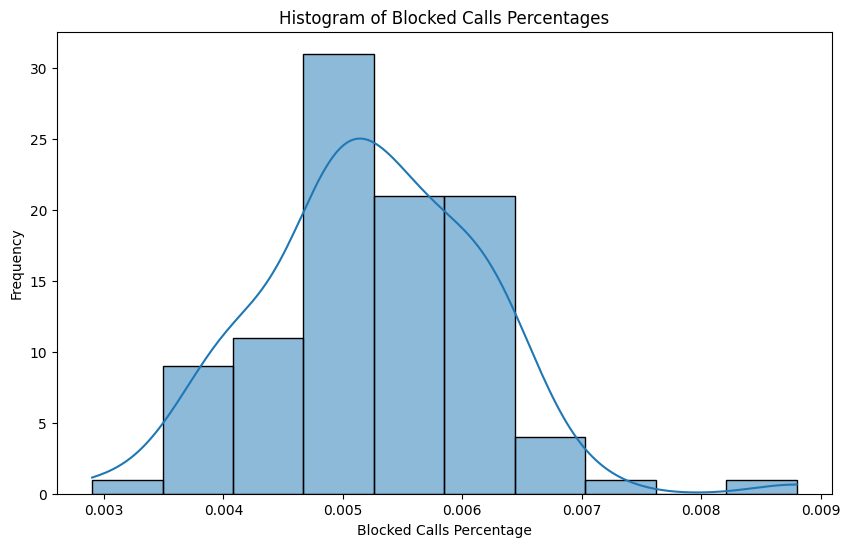

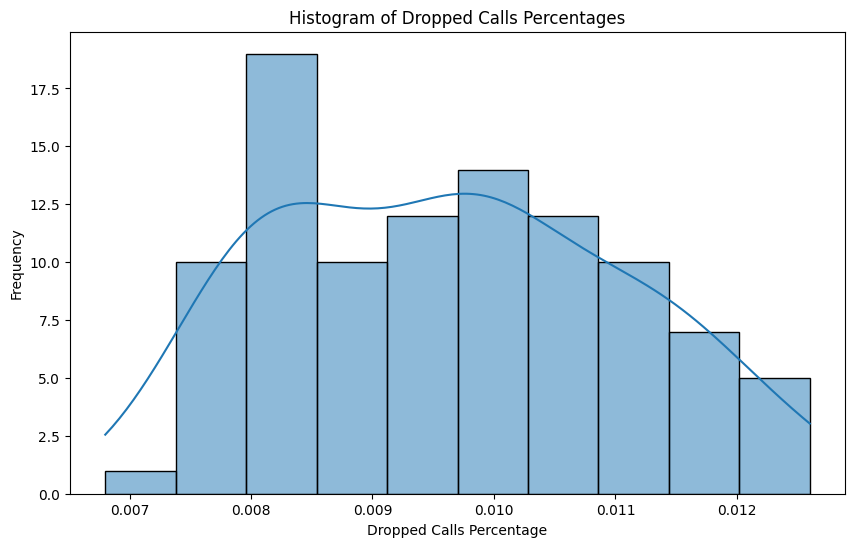

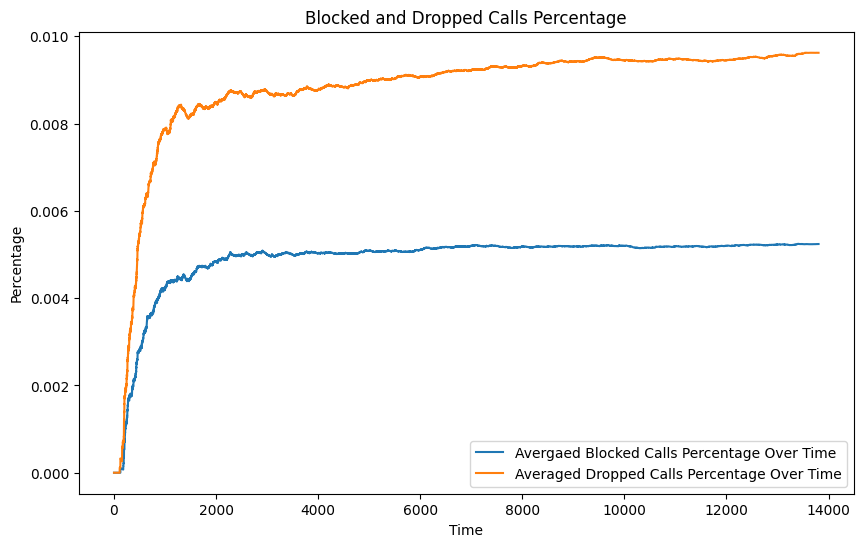

In [17]:
# Variables
cell_channels = [10] * 20
clock = 0
future_event_list = []
total_calls = 0
blocked_calls = 0
dropped_calls = 0
finished_calls = 0
FCA_SCHEME = ''
blocked_calls_percentage_lists = []
dropped_calls_percentage_lists = []
time_list = []


# simulate('no_reservation')

# Run simulation for n times
n = 100

# No Reservation
blocked_calls_percentages = [0]*n
dropped_calls_percentages = [0]*n

print('Running FCA scheme with no reservation')
for i in range(n):
    print(f'Running simulation {i+1}')
    blocked_calls_percentage, dropped_calls_percentage = simulate('no_reservation')
    blocked_calls_percentages[i] = blocked_calls_percentage
    dropped_calls_percentages[i] = dropped_calls_percentage
    
# print average
print('Average of blocked calls percentages:', np.mean(blocked_calls_percentages)*100, '%')
print('Average of dropped calls percentages:', np.mean(dropped_calls_percentages)*100, '%')

# plot histogram of blocked calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(blocked_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Blocked Calls Percentages')
plt.xlabel('Blocked Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# plot histogram of dropped calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(dropped_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Dropped Calls Percentages')
plt.xlabel('Dropped Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# Warm-up period
averaged_blocked_calls_percentage_over_time = []
averaged_dropped_calls_percentage_over_time = []

for i in range(len(time_list)):
    blocked_calls_percentages = [item[i] for item in blocked_calls_percentage_lists]
    dropped_calls_percentages = [item[i] for item in dropped_calls_percentage_lists]
    
    averaged_blocked_calls_percentage_over_time.append(np.mean(blocked_calls_percentages))
    averaged_dropped_calls_percentage_over_time.append(np.mean(dropped_calls_percentages))

# plot blocked calls percentage with time
plt.figure(figsize=(10, 6))
plt.plot(time_list, averaged_blocked_calls_percentage_over_time, label='Avergaed Blocked Calls Percentage Over Time')
plt.plot(time_list, averaged_dropped_calls_percentage_over_time, label='Averaged Dropped Calls Percentage Over Time')
plt.title('Blocked and Dropped Calls Percentage')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend()
plt.show()


Original time list length: 36934
Average of blocked calls percentages over time before removing warm-up period: 0.4914701459284596 %
Average of dropped calls percentages over time before removing warm-up period: 0.8836712661174788 %
New time list length: 25970
Average of blocked calls percentages over time after removing warm-up period: 0.5164123656059172 %
Average of dropped calls percentages over time after removing warm-up period: 0.931715813931353 %


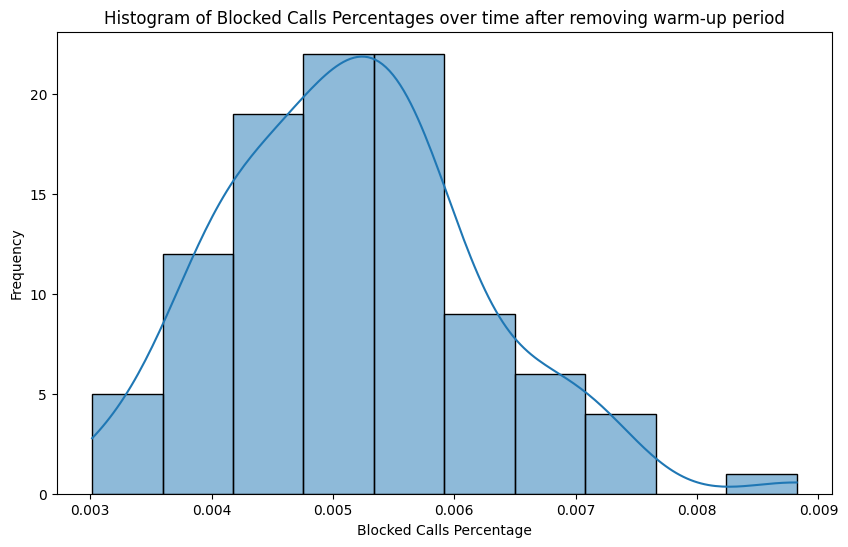

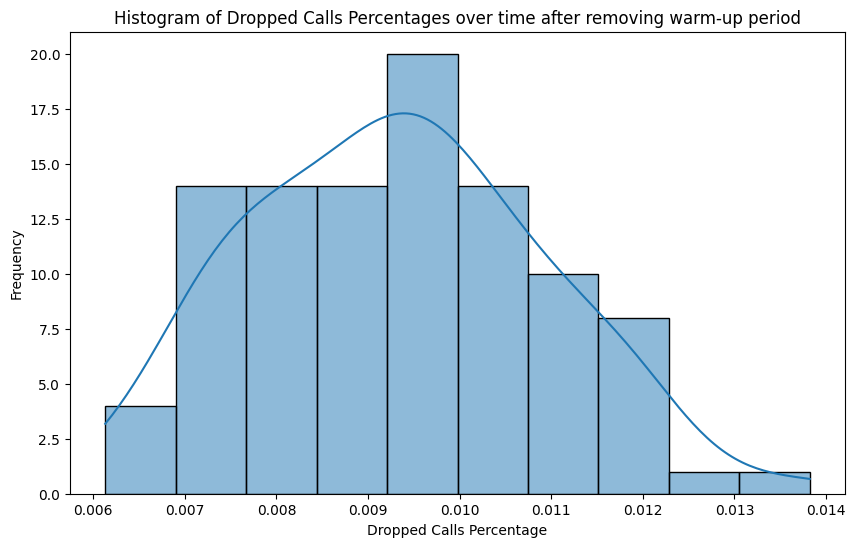

Statistical Significance Test for Blocked Calls Percentages
Half-width value (%): 0.017118181700637013
Half-width percentage of point estimator(%) 0.5164123656059172 : 3.3148280019499343 %
90% confidence interval of point estimator(%) 0.5164123656059172 : (0.4992941839052802, 0.5335305473065542)
Statistical Significance Test for Dropped Calls Percentages
Half-width value (%): 0.02626934112042056
Half-width percentage of point estimator(%) 0.931715813931353 : 2.8194585438641093 %
90% confidence interval of point estimator(%) 0.931715813931353 : (0.9054464728109325, 0.9579851550517736)


In [18]:
# Now as we can see that both results warm-up period is around 4000 seconds
# We will remove the warm-up period data
original_time_list_length = len(time_list)
print('Original time list length:', original_time_list_length)

# Before removing warm-up period
for i in range(n):
    blocked_calls_percentages[i] = np.mean(blocked_calls_percentage_lists[i])
    dropped_calls_percentages[i] = np.mean(dropped_calls_percentage_lists[i])
    
print('Average of blocked calls percentages over time before removing warm-up period:', np.mean(blocked_calls_percentages)*100, '%')
print('Average of dropped calls percentages over time before removing warm-up period:', np.mean(dropped_calls_percentages)*100, '%')


# Determine how many data points to remove
new_time_list = []
for i in range(len(time_list)):
    if time_list[i] >= 4000:
        new_time_list = time_list[i:]
        break

new_time_list_length = len(new_time_list)
print('New time list length:', new_time_list_length)

diff_length = original_time_list_length - new_time_list_length

new_blocked_calls_percentage_lists = [item[diff_length:] for item in blocked_calls_percentage_lists]
new_dropped_calls_percentage_lists = [item[diff_length:] for item in dropped_calls_percentage_lists]

for i in range(n):
    blocked_calls_percentages[i] = np.mean(new_blocked_calls_percentage_lists[i])
    dropped_calls_percentages[i] = np.mean(new_dropped_calls_percentage_lists[i])

print('Average of blocked calls percentages over time after removing warm-up period:', np.mean(blocked_calls_percentages)*100, '%')
print('Average of dropped calls percentages over time after removing warm-up period:', np.mean(dropped_calls_percentages)*100, '%')
    
# plot histogram of blocked calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(blocked_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Blocked Calls Percentages over time after removing warm-up period')
plt.xlabel('Blocked Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# plot histogram of dropped calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(dropped_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Dropped Calls Percentages over time after removing warm-up period')
plt.xlabel('Dropped Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# Statistical Significance Test
# https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
# Half-width of the 90% confidence interval, for n = 100
print('Statistical Significance Test for Blocked Calls Percentages')
half_width = 1.660 * np.std(blocked_calls_percentages) / np.sqrt(n)
point_estimator = np.mean(blocked_calls_percentages)
half_width_percentage = half_width/point_estimator * 100
print('Half-width value (%):', half_width * 100)
print('Half-width percentage of point estimator(%)', point_estimator*100, ':', half_width_percentage, '%')
# Confidence interval
confidence_interval = (point_estimator*100 - half_width*100, point_estimator*100 + half_width*100)
print('90% confidence interval of point estimator(%)' , point_estimator*100, ':', confidence_interval)

print('Statistical Significance Test for Dropped Calls Percentages')
half_width = 1.660 * np.std(dropped_calls_percentages) / np.sqrt(n)
point_estimator = np.mean(dropped_calls_percentages)
half_width_percentage = half_width/point_estimator * 100
print('Half-width value (%):', half_width * 100)
print('Half-width percentage of point estimator(%)', point_estimator*100, ':', half_width_percentage, '%')
# Confidence interval
confidence_interval = (point_estimator*100 - half_width*100, point_estimator*100 + half_width*100)
print('90% confidence interval of point estimator(%)' , point_estimator*100, ':', confidence_interval)


Running FCA scheme with reservation
Running simulation 1
Running simulation 2
Running simulation 3
Running simulation 4
Running simulation 5
Running simulation 6
Running simulation 7
Running simulation 8
Running simulation 9
Running simulation 10
Running simulation 11
Running simulation 12
Running simulation 13
Running simulation 14
Running simulation 15
Running simulation 16
Running simulation 17
Running simulation 18
Running simulation 19
Running simulation 20
Running simulation 21
Running simulation 22
Running simulation 23
Running simulation 24
Running simulation 25
Running simulation 26
Running simulation 27
Running simulation 28
Running simulation 29
Running simulation 30
Running simulation 31
Running simulation 32
Running simulation 33
Running simulation 34
Running simulation 35
Running simulation 36
Running simulation 37
Running simulation 38
Running simulation 39
Running simulation 40
Running simulation 41
Running simulation 42
Running simulation 43
Running simulation 44
Runni

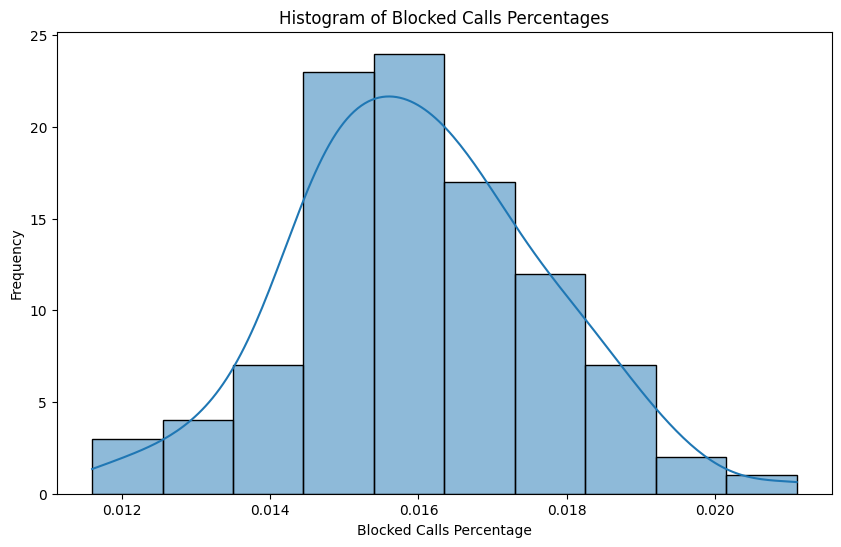

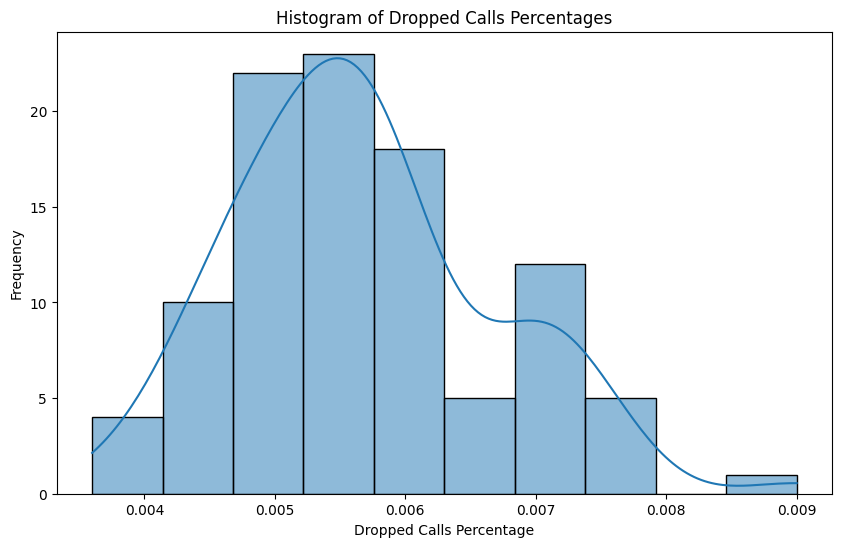

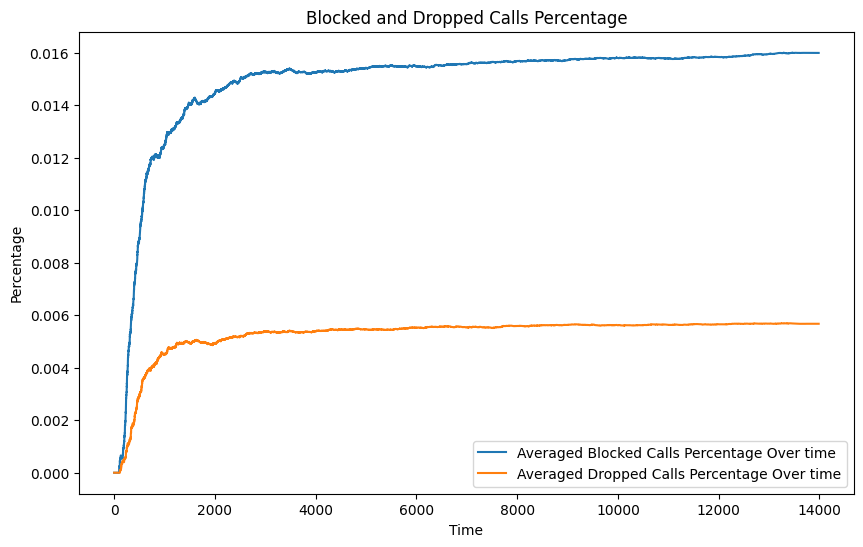

In [19]:
# Variables
cell_channels = [10] * 20
clock = 0
future_event_list = []
total_calls = 0
blocked_calls = 0
dropped_calls = 0
finished_calls = 0
FCA_SCHEME = ''
blocked_calls_percentage_lists = []
dropped_calls_percentage_lists = []
time_list = []


# Reservation
print('Running FCA scheme with reservation')
for i in range(n):
    print(f'Running simulation {i+1}')
    blocked_calls_percentage, dropped_calls_percentage = simulate('reservation')
    blocked_calls_percentages[i] = blocked_calls_percentage
    dropped_calls_percentages[i] = dropped_calls_percentage

# print average
print('Average of blocked calls percentages:', np.mean(blocked_calls_percentages)*100, '%')
print('Average of dropped calls percentages:', np.mean(dropped_calls_percentages)*100, '%')

# plot histogram of blocked calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(blocked_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Blocked Calls Percentages')
plt.xlabel('Blocked Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# plot histogram of dropped calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(dropped_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Dropped Calls Percentages')
plt.xlabel('Dropped Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# Warm-up period
averaged_blocked_calls_percentage_over_time = []
averaged_dropped_calls_percentage_over_time = []

for i in range(len(time_list)):
    blocked_calls_percentages = [item[i] for item in blocked_calls_percentage_lists]
    dropped_calls_percentages = [item[i] for item in dropped_calls_percentage_lists]
    
    averaged_blocked_calls_percentage_over_time.append(np.mean(blocked_calls_percentages))
    averaged_dropped_calls_percentage_over_time.append(np.mean(dropped_calls_percentages))
  
# plot averaged blocked calls percentage with time
plt.figure(figsize=(10, 6))
plt.plot(time_list, averaged_blocked_calls_percentage_over_time, label='Averaged Blocked Calls Percentage Over time')
plt.plot(time_list, averaged_dropped_calls_percentage_over_time, label='Averaged Dropped Calls Percentage Over time')
plt.title('Blocked and Dropped Calls Percentage')
plt.xlabel('Time')
plt.ylabel('Percentage')
plt.legend()
plt.show()




Original time list length: 36617
Average of blocked calls percentages over time before removing warm-up period: 1.4921692633134445 %
Average of dropped calls percentages over time before removing warm-up period: 0.5289102201876058 %
New time list length: 25882
Average of blocked calls percentages over time after removing warm-up period: 1.5680262813334769 %
Average of dropped calls percentages over time after removing warm-up period: 0.5586472914819876 %


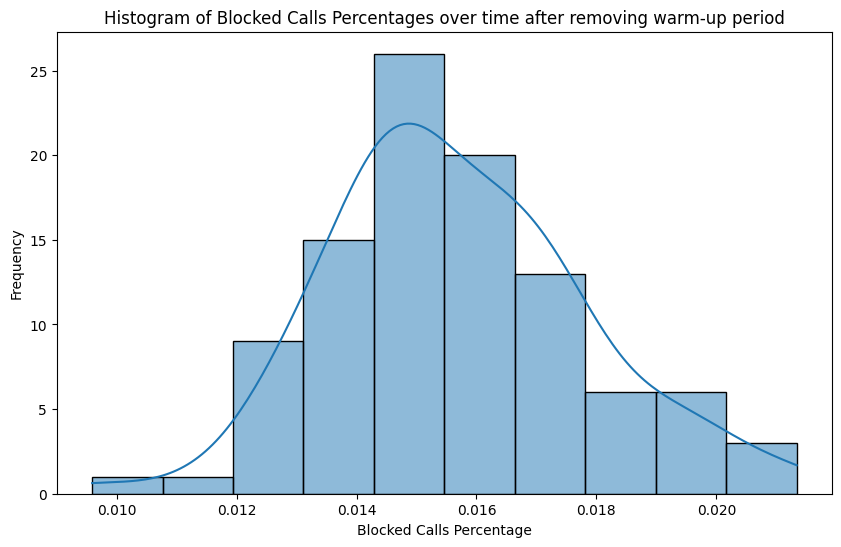

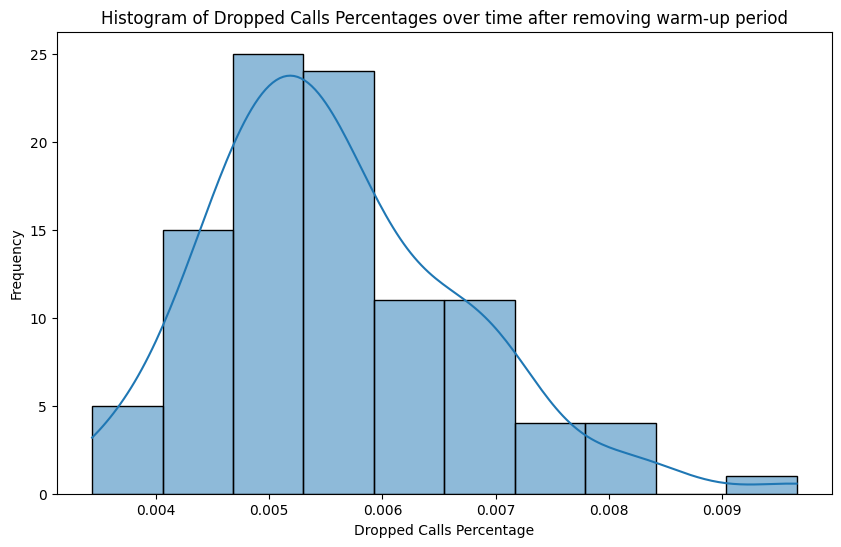

Statistical Significance Test for Blocked Calls Percentages
Half-width value (%): 0.03522974811679702
Half-width percentage of point estimator(%) 1.5680262813334769 : 2.246757502485037 %
90% confidence interval of point estimator(%) 1.5680262813334769 : (1.53279653321668, 1.6032560294502738)
Statistical Significance Test for Dropped Calls Percentages
Half-width value (%): 0.01852848794689659
Half-width percentage of point estimator(%) 0.5586472914819876 : 3.316670147588821 %
90% confidence interval of point estimator(%) 0.5586472914819876 : (0.540118803535091, 0.5771757794288841)


In [20]:
# Now as we can see that both results warm-up period is around 4000 seconds
# We will remove the warm-up period data
original_time_list_length = len(time_list)
print('Original time list length:', original_time_list_length)

# Before removing warm-up period
for i in range(n):
    blocked_calls_percentages[i] = np.mean(blocked_calls_percentage_lists[i])
    dropped_calls_percentages[i] = np.mean(dropped_calls_percentage_lists[i])
    
print('Average of blocked calls percentages over time before removing warm-up period:', np.mean(blocked_calls_percentages)*100, '%')
print('Average of dropped calls percentages over time before removing warm-up period:', np.mean(dropped_calls_percentages)*100, '%')


# Determine how many data points to remove
new_time_list = []
for i in range(len(time_list)):
    if time_list[i] >= 4000:
        new_time_list = time_list[i:]
        break

new_time_list_length = len(new_time_list)
print('New time list length:', new_time_list_length)

diff_length = original_time_list_length - new_time_list_length

new_blocked_calls_percentage_lists = [item[diff_length:] for item in blocked_calls_percentage_lists]
new_dropped_calls_percentage_lists = [item[diff_length:] for item in dropped_calls_percentage_lists]

for i in range(n):
    blocked_calls_percentages[i] = np.mean(new_blocked_calls_percentage_lists[i])
    dropped_calls_percentages[i] = np.mean(new_dropped_calls_percentage_lists[i])

print('Average of blocked calls percentages over time after removing warm-up period:', np.mean(blocked_calls_percentages)*100, '%')
print('Average of dropped calls percentages over time after removing warm-up period:', np.mean(dropped_calls_percentages)*100, '%')
    
# plot histogram of blocked calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(blocked_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Blocked Calls Percentages over time after removing warm-up period')
plt.xlabel('Blocked Calls Percentage')
plt.ylabel('Frequency')
plt.show()

# plot histogram of dropped calls percentages
plt.figure(figsize=(10, 6))
sns.histplot(dropped_calls_percentages, bins=10, kde=True)
plt.title('Histogram of Dropped Calls Percentages over time after removing warm-up period')
plt.xlabel('Dropped Calls Percentage')
plt.ylabel('Frequency')
plt.show()


# Statistical Significance Test
# https://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf
# Half-width of the 90% confidence interval, for n = 100
print('Statistical Significance Test for Blocked Calls Percentages')
half_width = 1.660 * np.std(blocked_calls_percentages) / np.sqrt(n)
point_estimator = np.mean(blocked_calls_percentages)
half_width_percentage = half_width/point_estimator * 100
print('Half-width value (%):', half_width * 100)
print('Half-width percentage of point estimator(%)', point_estimator*100, ':', half_width_percentage, '%')
# Confidence interval
confidence_interval = (point_estimator*100 - half_width*100, point_estimator*100 + half_width*100)
print('90% confidence interval of point estimator(%)' , point_estimator*100, ':', confidence_interval)

print('Statistical Significance Test for Dropped Calls Percentages')
half_width = 1.660 * np.std(dropped_calls_percentages) / np.sqrt(n)
point_estimator = np.mean(dropped_calls_percentages)
half_width_percentage = half_width/point_estimator * 100
print('Half-width value (%):', half_width * 100)
print('Half-width percentage of point estimator(%)', point_estimator*100, ':', half_width_percentage, '%')
# Confidence interval
confidence_interval = (point_estimator*100 - half_width*100, point_estimator*100 + half_width*100)
print('90% confidence interval of point estimator(%)' , point_estimator*100, ':', confidence_interval)
